# Get TF availability for these motifbreakR results

11/28/2022

In [6]:
library(pheatmap)  
library(tidyverse)
library(RColorBrewer)
library(viridis)

save_pheatmap_png <- function(x, filename, width=1200, height=1000, res = 200) {
  png(filename, width = width, height = height, res = res)
  grid::grid.newpage()
  grid::grid.draw(x$gtable)
  dev.off()
}

save_pheatmap_pdf <- function(x, filename, width=7, height=7) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename, width=width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}


# rna_df is samples x genes and removed low variances genes
remove_lowvar_genes = function(rna_df){
    nzv_cols <- nearZeroVar(rna_df)
    print(dim(rna_df))
    if(length(nzv_cols) > 0) rna_df <- rna_df[, -nzv_cols]
    print(dim(rna_df))
    return(rna_df)

}




In [7]:
tfs_arr = c('TEAD4',
'JUND',
'JUN',
'JUNB',
'SOX17',
'PAX5',
'SP1',
'FOXC1',
'IRF5',
'RUNX1',
'MAF',
'MAFK',
'HOXC6',
'RUNX3',
'ATF1',
'KLF4',
'GLI1',
'ESR2',
'RARB'
           )




In [26]:
rna_df = read.csv('../data/interim/rna/tissue_tpm_sym.csv',row.names=1)
colnames(rna_df)
colnames(rna_df)= c('AST','A.NPC.D0','A.NPC.D2','P.NPC.D0','P.NPC.D2','ES','N.D2','N.D10','N.D28')
rna_df = rna_df[,c('AST','ES','N.D2','N.D10','N.D28','A.NPC.D0','A.NPC.D2','P.NPC.D0','P.NPC.D2')]
head(rna_df)

[1] "Astrocytes" "SL_D0"      "SL_D2"      "SLC_D0"     "SLC_D2"    
[6] "H9_D0"      "H9_D2"      "H9_D10"     "H9_D28"

,AST,ES,N.D2,N.D10,N.D28,A.NPC.D0,A.NPC.D2,P.NPC.D0,P.NPC.D2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,18.660,12.485,7.470000000,5.27,5.475,7.230,4.01666667,6.993333333,3.616666667
A1BG-AS1,0.430,0.915,2.770000000,3.30,3.710,2.040,2.71000000,1.656666667,2.700000000
A1CF,0.010,0.000,0.006666667,0.11,0.160,0.015,0.02666667,0.010000000,0.003333333
A2M,50.670,0.020,15.666666667,3.74,2.970,0.055,2.48333333,0.156666667,6.546666667
A2M-AS1,0.070,0.285,0.680000000,5.34,7.985,2.580,1.67000000,0.996666667,2.160000000
A2ML1,0.055,5.020,1.066666667,0.06,0.000,0.115,0.01333333,0.006666667,0.000000000


Warning message in brewer.pal(n = 11, name = "Reds"):
“n too large, allowed maximum for palette Reds is 9
Returning the palette you asked for with that many colors
”


pdf 
  2

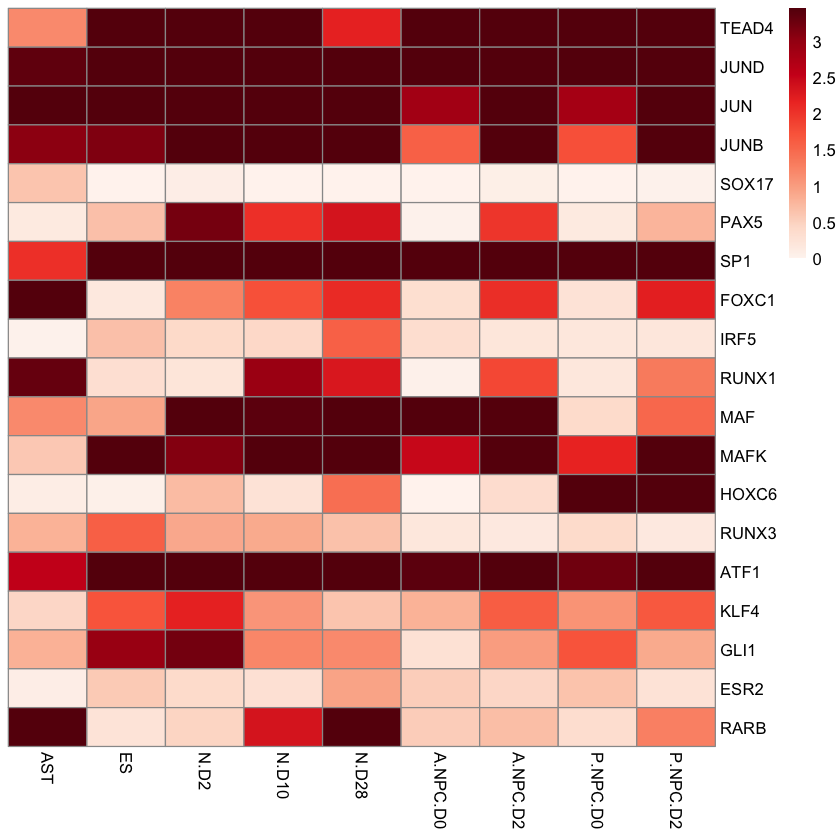

In [38]:
df =  rna_df[tfs_arr,] 

df[df>10] = 10

df = log2(df+1)
p = pheatmap(df,cluster_cols=F,cluster_rows=F, 
             color = colorRampPalette(brewer.pal(n =11, name ="Reds"))(255))

save_pheatmap_pdf(p, '../data/processed/fig1/rna/motifbreakr_tfs_rnaexpr.pdf')

In [13]:
brainmap_expr_df_region = read.csv(paste0('../data/processed/fig1/rna_10xm1/', 'brainmap_expr_df_region.csv'),row.names=1)
dim(brainmap_expr_df_region)


[1]     8 50281

In [40]:
colSums(brainmap_expr_df_region[,tfs_arr])

TEAD4  JUND   JUN  JUNB SOX17  PAX5   SP1 FOXC1  IRF5 RUNX1   MAF  MAFK HOXC6 
    0     3     0     0     0     0     1     0     0     0     2     0     0 
RUNX3  ATF1  KLF4  GLI1  ESR2  RARB 
    0     7     0     0     1    42